<a href="https://colab.research.google.com/github/hyemin0408/2025-1-myclass-BDA/blob/main/inclass/09w_B_web_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 9주차 수업


## 결측값 제거하기


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [8]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score']

,score
0,5.0
1,4.0
2,3.0
3,4.0


In [10]:
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss['score']

,score
0,5.0
1,4.0
3,4.0


In [11]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [12]:
df.score.mean()

np.float64(4.0)

In [13]:
df['score'].sum()

np.float64(16.0)

In [14]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [22]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [23]:
df1.empty

True

In [24]:
df1 = pd.DataFrame(columns=['col1','col2','col3'])
df1

,col1,col2,col3


In [25]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'],
                   columns=['col1', 'col2', 'col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [26]:
df1.empty

False

In [27]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.34 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [28]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


##  결측값 채워 넣기 fillna()

In [30]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [31]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [32]:
df = pd.DataFrame([1])
df

,0
0,1


In [33]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [34]:
df = pd.DataFrame([[1, 1, 2, 2]])
df

,0,1,2,3
0,1,1,2,2


In [35]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [36]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [39]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [40]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
50,dodge,dakota pickup 4wd,3.9,1999,6,auto(l4),4,13,17,r,pickup
37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
149,nissan,maxima,3.5,2008,6,auto(av),f,19,25,p,midsize
167,subaru,impreza awd,2.5,1999,4,manual(m5),4,19,26,r,subcompact
172,subaru,impreza awd,2.5,2008,4,manual(m5),4,20,27,r,compact
171,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact
31,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv


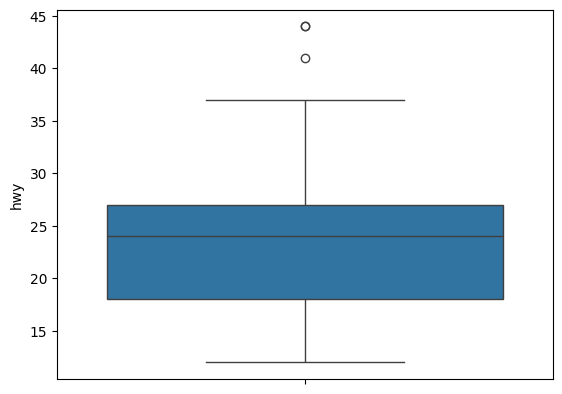

In [41]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

In [42]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

234

In [43]:
dmpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [44]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [45]:
len(mpg)

234

## 7장 종료